In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATADIR="/cellar/users/snwright/Data/RareCommon/"

## Heritability

In [139]:
pilot = pd.read_csv(DATADIR+"pilot2_netcoloc_results_combined.txt", sep="\t")


In [141]:
traits = {"30630":"Apolipoprotein A", "30640":"Apolipoprotein B", "23110":"Impedance of Arm", "30830":"SHBG", "30840":"Total bilirubin", 
            "30050": "Mean corpuscular haemoglobin", "30140":"Neutrophil count", "30250": "Reticulocyte count", "30880":"Urate",
         "20015":"Sitting Height", "20151":"Forced Vital Capacity", "23098":"Weight",
        "2453": "Cancer Diagnosis", "3063":"Forced Expiratory Volume", "30680":"Calcium", "5133":"6mm strong meridian (R)"}
int_traits = {}
for t in traits:
    int_traits[int(t)] = traits[t]
traits = {**traits,**int_traits,  "C3_PRIMARY_LYMPHOID_HEMATOPOIETIC":"ICD10:Primary lymphoid/haem. malignant neoplasms", "C92":"ICD10:Myeloid Leukemia", 
          "D46":"ICD10:Myelodysplastic Syndromes", "D47":"ICD10: Other lymphoid/haem. neoplasms", 
          "XVII_MALFORMAT_ABNORMAL":"ICD10:Congenital Abnormalities" }
missing_traits = ["C92","D46", "XVII_MALFORMAT_ABNORMAL"]
pilot = pilot.replace(traits)

In [142]:
keep_traits = ['Apolipoprotein A', 'Apolipoprotein B', 'SHBG', 'Total bilirubin',
       'Urate', 'Impedance of Arm', 'Mean corpuscular haemoglobin',
       'Neutrophil count', 'Reticulocyte count', 'Sitting Height',
       'Forced Vital Capacity', 'Weight', 
       'Forced Expiratory Volume', '6mm strong meridian (R)']

In [143]:
pilot = pilot[(pilot.Trait_Common.isin(keep_traits)) & (pilot.Trait_Rare.isin(keep_traits))]

In [144]:
pilot.Trait_Common.unique()

array(['Apolipoprotein A', 'Apolipoprotein B', 'SHBG', 'Total bilirubin',
       'Urate', 'Impedance of Arm', 'Mean corpuscular haemoglobin',
       'Neutrophil count', 'Reticulocyte count', 'Sitting Height',
       'Forced Vital Capacity', 'Weight', 'Forced Expiratory Volume',
       '6mm strong meridian (R)'], dtype=object)

In [147]:
h2 = {'Apolipoprotein A':0.285, 'Apolipoprotein B':0.0915, 'SHBG':0.230, 'Total bilirubin':0.543,
       'Urate':0.214, 'Impedance of Arm':0.246, 'Mean corpuscular haemoglobin':0.253,
       'Neutrophil count':0.164, 'Reticulocyte count':0.227, 'Sitting Height':0.349,
       'Forced Vital Capacity':0.21, 'Weight':0.26, 'Forced Expiratory Volume':0.192,
       '6mm strong meridian (R)':0.423}

In [148]:
within = pilot.loc[pilot.Trait_Common==pilot.Trait_Rare]

In [152]:
within["h2"] = within.Trait_Common.apply(lambda x: h2[x])

/tmp/ipykernel_1316558/1954293754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within["h2"] = within.Trait_Common.apply(lambda x: h2[x])


In [155]:
within["OE"] = within["Size"]/within["Null_Size"]
within["log10"] = -1 * np.log10(within.p_Size)

/tmp/ipykernel_1316558/3171938243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within["OE"] = within["Size"]/within["Null_Size"]
/tmp/ipykernel_1316558/3171938243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  within["log10"] = -1 * np.log10(within.p_Size)


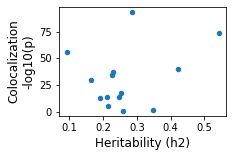

In [169]:
within.plot(kind="scatter", x="h2", y="log10", figsize=(3,2))
plt.xlabel("Heritability (h2)", fontsize=12)
plt.ylabel("Colocalization\n-log10(p)", fontsize=12)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/figures/heritability_v_colocalization.svg", bbox_inches='tight', dpi=400)

In [170]:
within

,Trait_Common,Trait_Rare,Mean_NPS,Null_NPS,p_NPS,Size,Null_Size,p_Size,h2,OE,log10
9,Sitting Height,Sitting Height,0.073725,-0.018487,1.924000e-05,332,303.613,3.428000e-02,0.3490,1.093497,1.464959
30,Forced Vital Capacity,Forced Vital Capacity,0.170468,-0.003111,5.132000e-20,390,279.280,4.833000e-14,0.2100,1.396448,13.315783
52,Weight,Weight,-0.072614,-0.025355,9.798000e-01,334,318.847,1.644000e-01,0.2600,1.047524,0.784098
67,Impedance of Arm,Impedance of Arm,0.145336,-0.012121,2.694000e-14,433,310.176,8.812000e-15,0.2460,1.395982,14.054926
108,Mean corpuscular haemoglobin,Mean corpuscular haemoglobin,0.259872,-0.025448,3.284000e-37,414,288.927,3.522000e-18,0.2530,1.432888,17.453211
129,Neutrophil count,Neutrophil count,0.164688,-0.002170,4.723000e-14,484,313.767,4.092000e-30,0.1640,1.542546,29.388064
150,Reticulocyte count,Reticulocyte count,0.316627,-0.007086,4.341000e-62,453,272.508,1.562000e-35,0.2270,1.662337,34.806319
175,Forced Expiratory Volume,Forced Expiratory Volume,0.239883,0.003337,6.329000e-36,399,285.565,5.614000e-14,0.1920,1.397230,13.250728
183,Apolipoprotein A,Apolipoprotein A,0.368328,-0.075775,9.209000e-78,618,304.944,5.132000e-94,0.2850,2.026602,93.289713
205,Apolipoprotein B,Apolipoprotein B,0.283312,-0.027452,1.137000e-54,542,310.174,7.663000e-57,0.0915,1.747406,56.115601


In [161]:
from scipy.stats import pearsonr
pearsonr(within.h2, within.log10)

(0.2904151918877567, 0.3138140193262968)

## Correlation

In [ ]:
data = pd.read_csv(DATADIR + '/Reference/ukbb_corr_neale-2023-05-10.csv')
pilot = pd.read_csv(DATADIR +"pilot_netcoloc_results_trait_subset.tsv", sep="\t")

In [17]:
phenotypes = set(data.ID1.unique()).union(set(data.ID2.unique()))

In [18]:
test = ['C92', '2453', '30680', 'C92', 'C3', 'D46', 'D47', 'XVII', '30630', '30640', '30840', '30880', '23110', '30050',
       '30140', '30250', 'E80']
for term in test:
    for pheno in phenotypes:
        if term in pheno:
            print(pheno)

C3_OTHER_SKIN
C3_BREAST_3
C3_MALE_GENITAL
C3_SKIN
C3_PROSTATE
C3_DIGESTIVE_ORGANS
XVIII_MISCFINDINGS
23110
30050
30140
30250


In [19]:
present = ['20015','20151', '23098', '3063', '5133', '23110', '30050', '30140', '30250']

In [20]:
names = {'20015':'Sitting Height','20151':'Forced Vital Capacity', '23098':'Weight', '3063':'Forced expiratory volume',
         '5133':'6mm strong meridian', '23110':'Impedance of arm', '30050':"Mean corpuscular haemoglobin",
         '30140':"Neutrophil count", '30250':'Reticulocyte count'}

In [21]:
compare = data[((data.ID2.isin(present)) & (data.ID1.isin(present)))]

In [22]:
compare["Pheno1"] = compare['ID1'].apply(lambda x: names[x])
compare["Pheno2"] = compare['ID2'].apply(lambda x: names[x])

/tmp/ipykernel_1316558/3252378282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Pheno1"] = compare['ID1'].apply(lambda x: names[x])
/tmp/ipykernel_1316558/3252378282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Pheno2"] = compare['ID2'].apply(lambda x: names[x])


In [23]:
compare_table = compare.pivot('Pheno1', 'Pheno2', 'rg')

In [24]:
compare_table = compare_table.fillna(1)

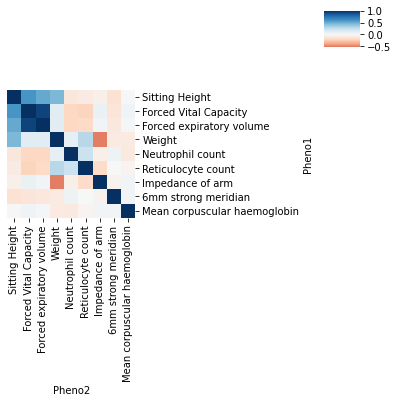

In [25]:
plt.rcParams['svg.fonttype'] = 'none'
cg = sns.clustermap(compare_table, cmap = 'RdBu', center=0, figsize=(5,5), cbar_pos=(1,1, 0.1, 0.1))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/genetic_correlations.svg", dpi=400, bbox_inches='tight')

In [26]:
compare.head()

,ID1,ID2,Phenotype 1,Phenotype 2,h2,h2 SE,h2 intercept,h2 intercept SE,rpheno,rg,rg SE,Z,p,rg intercept,rg intercept SE,Pheno1,Pheno2
92737,20015,20151,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_20...,0.2345,0.010300,1.096,0.02031,0.373581,0.592200,0.01643,36.0400,1.750000e-284,0.40960,0.02451,Sitting Height,Forced Vital Capacity
92834,20015,23098,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_23...,0.2635,0.009121,1.080,0.02183,0.346019,0.445300,0.01630,27.3300,2.005000e-164,0.40690,0.02162,Sitting Height,Weight
92845,20015,23110,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_23...,0.2308,0.008072,1.106,0.02215,-0.092338,-0.056000,0.01903,-2.9420,3.257000e-03,-0.10320,0.01246,Sitting Height,Impedance of arm
92912,20015,30050,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.2348,0.029600,1.154,0.06406,-0.012837,-0.007373,0.01754,-0.4204,6.742000e-01,-0.01892,0.01166,Sitting Height,Mean corpuscular haemoglobin
92921,20015,30140,<a href='https://ukbb-rg.hail.is/rg_summary_20...,<a href='https://ukbb-rg.hail.is/rg_summary_30...,0.1589,0.016870,1.123,0.03657,-0.067485,-0.113400,0.01897,-5.9750,2.296000e-09,-0.08215,0.01176,Sitting Height,Neutrophil count


In [74]:
compare["Pair"] = compare.apply(lambda x: "-".join(sorted([x.Pheno1, x.Pheno2])), axis=1)

/tmp/ipykernel_1316558/2160559110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare["Pair"] = compare.apply(lambda x: "-".join(sorted([x.Pheno1, x.Pheno2])), axis=1)


In [76]:
compare_dedup = compare.drop_duplicates(subset="Pair")

In [84]:
plot_data1 = pilot.loc[:, ("Trait_Common", "Trait_Rare", "OE", "p_Size")].merge(compare_dedup.loc[:, ("Pheno1", "Pheno2", "rg", "Pair")], 
                                    right_on=["Pheno1", "Pheno2"], 
                                    left_on=["Trait_Common", "Trait_Rare"], how="inner")
plot_data2 = pilot.loc[:, ("Trait_Common", "Trait_Rare", "OE", "p_Size")].merge(compare_dedup.loc[:, ("Pheno1", "Pheno2", "rg", "Pair")], 
                                    right_on=["Pheno2", "Pheno1"], 
                                    left_on=["Trait_Common", "Trait_Rare"], how="inner")

In [85]:
plot_data = pd.concat([plot_data1, plot_data2]).sort_values(by=["Pheno1", "Pheno2"])
plot_data["log10"] = -1 * np.log10(plot_data.p_Size)

In [86]:
plot_data[""]

,Trait_Common,Trait_Rare,OE,p_Size,Pheno1,Pheno2,rg,Pair,log10
4,Forced Vital Capacity,Mean corpuscular haemoglobin,0.868450,9.953000e-01,Forced Vital Capacity,Mean corpuscular haemoglobin,0.04212,Forced Vital Capacity-Mean corpuscular haemogl...,0.002046
5,Mean corpuscular haemoglobin,Forced Vital Capacity,1.472136,4.351000e-19,Forced Vital Capacity,Mean corpuscular haemoglobin,0.04212,Forced Vital Capacity-Mean corpuscular haemogl...,18.361411
8,Forced Vital Capacity,Neutrophil count,0.905206,9.663000e-01,Forced Vital Capacity,Neutrophil count,-0.20560,Forced Vital Capacity-Neutrophil count,0.014888
6,Neutrophil count,Forced Vital Capacity,1.231301,2.823000e-06,Forced Vital Capacity,Neutrophil count,-0.20560,Forced Vital Capacity-Neutrophil count,5.549289
12,Forced Vital Capacity,Reticulocyte count,0.765196,1.000000e+00,Forced Vital Capacity,Reticulocyte count,-0.21750,Forced Vital Capacity-Reticulocyte count,-0.000000


In [97]:
def plot_lines_between_pairs(data, x_col, y_col, pair_column, ax):
    pairs = data[pair_column].unique()
    for pair in pairs:
        x_values = data[data[pair_column]==pair][x_col].values
        y_values = data[data[pair_column]==pair][y_col].values
        if len(x_values) > 1:
            ax.plot(x_values, y_values, marker=None, linestyle="--", color="grey", zorder=0, lw=1)

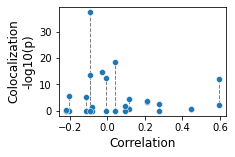

In [166]:
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,2))
sns.scatterplot(data=plot_data, x="rg", y="log10", zorder=10, legend=None)
ax = plt.gca()
plot_lines_between_pairs(plot_data, 'rg', 'log10', 'Pair', ax)
ax.set_xlabel("Correlation", fontsize=12)
ax.set_ylabel("Colocalization\n-log10(p)", fontsize=12)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/figures/correlation_v_colocalization.svg", bbox_inches='tight', dpi=400)

In [127]:
plot_data.sort_values(by="log10")

,Trait_Common,Trait_Rare,OE,p_Size,Pheno1,Pheno2,rg,Pair,log10
9,Weight,Neutrophil count,0.729145,1.000000e+00,Weight,Neutrophil count,0.094250,Neutrophil count-Weight,-0.000000
12,Forced Vital Capacity,Reticulocyte count,0.765196,1.000000e+00,Forced Vital Capacity,Reticulocyte count,-0.217500,Forced Vital Capacity-Reticulocyte count,-0.000000
11,Sitting Height,Reticulocyte count,0.714226,1.000000e+00,Sitting Height,Reticulocyte count,-0.081520,Reticulocyte count-Sitting Height,-0.000000
7,Sitting Height,Neutrophil count,0.727662,1.000000e+00,Sitting Height,Neutrophil count,-0.113400,Neutrophil count-Sitting Height,-0.000000
13,Weight,Reticulocyte count,0.756334,1.000000e+00,Weight,Reticulocyte count,0.274500,Reticulocyte count-Weight,-0.000000
3,Sitting Height,Mean corpuscular haemoglobin,0.838083,9.996000e-01,Sitting Height,Mean corpuscular haemoglobin,-0.007373,Mean corpuscular haemoglobin-Sitting Height,0.000174
5,Weight,Mean corpuscular haemoglobin,0.846933,9.992000e-01,Weight,Mean corpuscular haemoglobin,-0.092280,Mean corpuscular haemoglobin-Weight,0.000348
4,Forced Vital Capacity,Mean corpuscular haemoglobin,0.868450,9.953000e-01,Forced Vital Capacity,Mean corpuscular haemoglobin,0.042120,Forced Vital Capacity-Mean corpuscular haemogl...,0.002046
8,Forced Vital Capacity,Neutrophil count,0.905206,9.663000e-01,Forced Vital Capacity,Neutrophil count,-0.205600,Forced Vital Capacity-Neutrophil count,0.014888
12,Neutrophil count,Mean corpuscular haemoglobin,0.950095,8.483000e-01,Mean corpuscular haemoglobin,Neutrophil count,-0.093310,Mean corpuscular haemoglobin-Neutrophil count,0.071451
